# Clustering using pyspark

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # install Java8
!wget -q https://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz # download spark 3.1.1
!tar xf spark-3.1.1-bin-hadoop2.7.tgz # unzip it
!pip install -q findspark # install findspark
!pip install pyspark==3.1.1 # install pyspark
!ls

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

import findspark
findspark.init()

import seaborn as sns
import pyspark.sql.functions as F
from pyspark.ml.linalg import Vectors
from pyspark.ml import feature
from pyspark.ml import clustering
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

clustering_dataset.csv	spark-3.1.1-bin-hadoop2.7      spark-3.1.1-bin-hadoop2.7.tgz.1
sample_data		spark-3.1.1-bin-hadoop2.7.tgz  spark-3.1.1-bin-hadoop2.7.tgz.2


In [2]:
df = spark.read.csv("/content/clustering_dataset.csv", header = True, inferSchema = True)

In [3]:
df.count()

75

In [4]:
df.printSchema()

root
 |-- col1: integer (nullable = true)
 |-- col2: integer (nullable = true)
 |-- col3: integer (nullable = true)



In [5]:
df.take(3)

[Row(col1=7, col2=4, col3=1),
 Row(col1=7, col2=7, col3=9),
 Row(col1=7, col2=9, col3=6)]

In [6]:
df.show()

+----+----+----+
|col1|col2|col3|
+----+----+----+
|   7|   4|   1|
|   7|   7|   9|
|   7|   9|   6|
|   1|   6|   5|
|   6|   7|   7|
|   7|   9|   4|
|   7|  10|   6|
|   7|   8|   2|
|   8|   3|   8|
|   4|  10|   5|
|   7|   4|   5|
|   7|   8|   4|
|   2|   5|   1|
|   2|   6|   2|
|   2|   3|   8|
|   3|   9|   1|
|   4|   2|   9|
|   1|   7|   1|
|   6|   2|   3|
|   4|   1|   9|
+----+----+----+
only showing top 20 rows



In [7]:
vector_assembler = feature.VectorAssembler(inputCols = ['col1', 'col2', 'col3'],
                                           outputCol = 'features')
df2 = vector_assembler.transform(df)
df2.show()

+----+----+----+--------------+
|col1|col2|col3|      features|
+----+----+----+--------------+
|   7|   4|   1| [7.0,4.0,1.0]|
|   7|   7|   9| [7.0,7.0,9.0]|
|   7|   9|   6| [7.0,9.0,6.0]|
|   1|   6|   5| [1.0,6.0,5.0]|
|   6|   7|   7| [6.0,7.0,7.0]|
|   7|   9|   4| [7.0,9.0,4.0]|
|   7|  10|   6|[7.0,10.0,6.0]|
|   7|   8|   2| [7.0,8.0,2.0]|
|   8|   3|   8| [8.0,3.0,8.0]|
|   4|  10|   5|[4.0,10.0,5.0]|
|   7|   4|   5| [7.0,4.0,5.0]|
|   7|   8|   4| [7.0,8.0,4.0]|
|   2|   5|   1| [2.0,5.0,1.0]|
|   2|   6|   2| [2.0,6.0,2.0]|
|   2|   3|   8| [2.0,3.0,8.0]|
|   3|   9|   1| [3.0,9.0,1.0]|
|   4|   2|   9| [4.0,2.0,9.0]|
|   1|   7|   1| [1.0,7.0,1.0]|
|   6|   2|   3| [6.0,2.0,3.0]|
|   4|   1|   9| [4.0,1.0,9.0]|
+----+----+----+--------------+
only showing top 20 rows



### K-means clustering

In [8]:
kmeans = clustering.KMeans(seed = 10).setK(3)
kmeans_model = kmeans.fit(df2)

In [9]:
kmeans_model.clusterCenters()

[array([35.88461538, 31.46153846, 34.42307692]),
 array([5.12, 5.84, 4.84]),
 array([80.        , 79.20833333, 78.29166667])]

In [10]:
kmeans_model.getDistanceMeasure()

'euclidean'

In [11]:
df2_cluster = kmeans_model.transform(df2)
df2_cluster.show(n = 10)

+----+----+----+--------------+----------+
|col1|col2|col3|      features|prediction|
+----+----+----+--------------+----------+
|   7|   4|   1| [7.0,4.0,1.0]|         1|
|   7|   7|   9| [7.0,7.0,9.0]|         1|
|   7|   9|   6| [7.0,9.0,6.0]|         1|
|   1|   6|   5| [1.0,6.0,5.0]|         1|
|   6|   7|   7| [6.0,7.0,7.0]|         1|
|   7|   9|   4| [7.0,9.0,4.0]|         1|
|   7|  10|   6|[7.0,10.0,6.0]|         1|
|   7|   8|   2| [7.0,8.0,2.0]|         1|
|   8|   3|   8| [8.0,3.0,8.0]|         1|
|   4|  10|   5|[4.0,10.0,5.0]|         1|
+----+----+----+--------------+----------+
only showing top 10 rows



In [12]:
df2_cluster.drop('features').show(n = 10)

+----+----+----+----------+
|col1|col2|col3|prediction|
+----+----+----+----------+
|   7|   4|   1|         1|
|   7|   7|   9|         1|
|   7|   9|   6|         1|
|   1|   6|   5|         1|
|   6|   7|   7|         1|
|   7|   9|   4|         1|
|   7|  10|   6|         1|
|   7|   8|   2|         1|
|   8|   3|   8|         1|
|   4|  10|   5|         1|
+----+----+----+----------+
only showing top 10 rows



In [13]:
import seaborn as sns

In [14]:
df2p = df2_cluster.drop('features').toPandas()
df2p.head()

,col1,col2,col3,prediction
0,7,4,1,1
1,7,7,9,1
2,7,9,6,1
3,1,6,5,1
4,6,7,7,1


<Axes: xlabel='col1', ylabel='col2'>

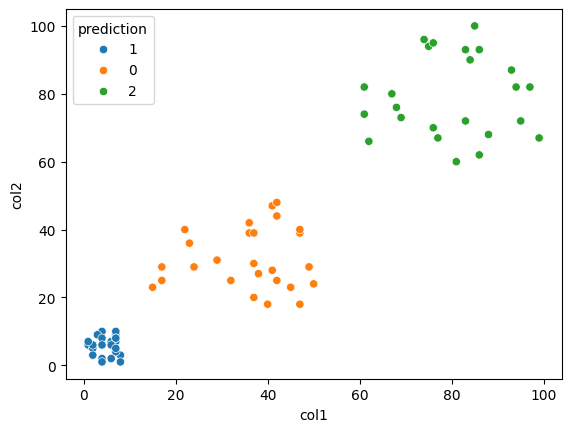

In [15]:
df2p['prediction'] = df2p.prediction.astype('str')
sns.scatterplot(data = df2p, x = 'col1', y = 'col2', hue = 'prediction')

### Bisecting K-means clustering

In [16]:
bkmeans = clustering.BisectingKMeans(seed = 10).setK(3)
bkmodel = bkmeans.fit(df2)

In [17]:
bkmodel.clusterCenters()

[array([5.12, 5.84, 4.84]),
 array([35.88461538, 31.46153846, 34.42307692]),
 array([80.        , 79.20833333, 78.29166667])]

In [18]:
df2_cluster_bisect = bkmodel.transform(df2)
df2_cluster_bisect.show(n = 10)

+----+----+----+--------------+----------+
|col1|col2|col3|      features|prediction|
+----+----+----+--------------+----------+
|   7|   4|   1| [7.0,4.0,1.0]|         0|
|   7|   7|   9| [7.0,7.0,9.0]|         0|
|   7|   9|   6| [7.0,9.0,6.0]|         0|
|   1|   6|   5| [1.0,6.0,5.0]|         0|
|   6|   7|   7| [6.0,7.0,7.0]|         0|
|   7|   9|   4| [7.0,9.0,4.0]|         0|
|   7|  10|   6|[7.0,10.0,6.0]|         0|
|   7|   8|   2| [7.0,8.0,2.0]|         0|
|   8|   3|   8| [8.0,3.0,8.0]|         0|
|   4|  10|   5|[4.0,10.0,5.0]|         0|
+----+----+----+--------------+----------+
only showing top 10 rows



In [19]:
df2p = df2_cluster_bisect.drop('features').toPandas()
df2p.head()

,col1,col2,col3,prediction
0,7,4,1,0
1,7,7,9,0
2,7,9,6,0
3,1,6,5,0
4,6,7,7,0


<Axes: xlabel='col1', ylabel='col2'>

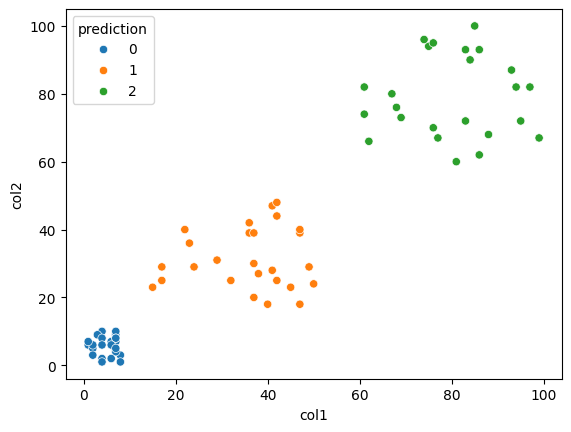

In [20]:
df2p['prediction'] = df2p.prediction.astype('str')
sns.scatterplot(data = df2p, x = 'col1', y = 'col2', hue = 'prediction')